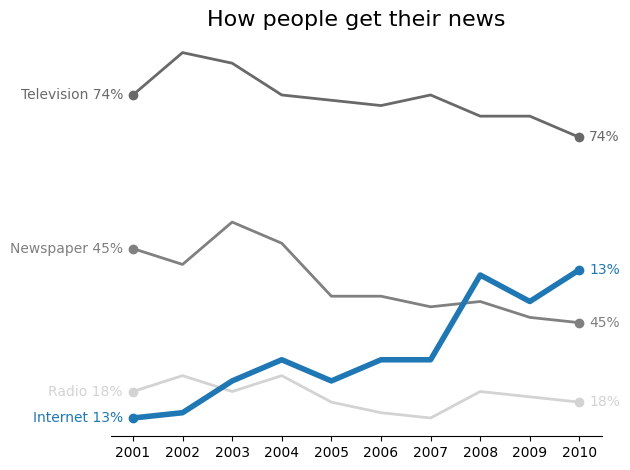

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.figure() #Se crea la figura vacía

colors = {
'Television': 'dimgray',
'Newspaper': 'grey',
'Internet': 'tab:blue', #paleta de colores de Tableau
'Radio': 'lightgrey',
}

#Nombres de las fuentes y las precedencias, entre más alto el número, queda por encima de las demás
zorder = {
'Television': 1,
'Newspaper': 1,
'Internet': 2,
'Radio': 1,
}

#Cambio de grosor de la línea
linewidths = {
'Television': 2,
'Newspaper': 2,
'Internet': 4,
'Radio': 2,
}

df = pd.read_csv("../files/input/news.csv",index_col=0) #Primera columna es el índice

for col in df.columns:
    plt.plot(
        df[col],
        color = colors[col],
        label = col, #etiqueta
        zorder = zorder[col],
        linewidth = linewidths[col]
    )


#Ruido visual: elementos que hay en la gráfica y no aportan valor
plt.title("How people get their news", fontsize=16)

#Eliminar las líneas del marco del gráfico
plt.gca().spines ['top'].set_visible(False)
plt.gca().spines ['left'].set_visible(False)
plt.gca().spines ['right'].set_visible(False)

#Eje y invisible
plt.gca().axes.get_yaxis().set_visible(False)

for col in df.columns:
    #Se pone el punto del primer año (valor de arranque) en las gráficas
    first_year = df.index [0]
    plt.scatter (
        x=first_year,
        y=df[col][first_year],
        color=colors[col],
        zorder=zorder[col],
    )
    #Valor en porcentaje año 1
    plt. text(
        first_year - 0.2, #para que no quede sobre la línea
        df [col] [first_year],
        col +" " + str(df[col][first_year]) + "%",
        ha= "right",
        va="center",
        color=colors [col],
    )
    #El último punto de la gráfica
    last_year = df.index[-1]
    plt.scatter (
        x=last_year,
        y=df[col][last_year],
        color=colors[col],
        zorder=zorder[col],
    )
    #Valor porcentaje último año
    plt. text(
        last_year + 0.2,
        df [col] [last_year],
        str(df[col][first_year]) + "%",
        ha= "left",
        va="center",
        color=colors [col],
    )

#Para que salgan los años completos
plt.xticks( #ejes donde aparecen los puntos en x
ticks=df.index,
labels=df. index,
ha='center',
)

if not os.path.exists("../files/plots"):
    os.makedirs("../files/plots")  
plt.tight_layout()
plt.savefig("../files/plots/news.png")
#plt.show()